In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [2]:
# first create dataset manually
def create_dataset(W: torch.Tensor, b: torch.Tensor, num_sample: int) -> torch.Tensor:
    # W: (10, 1), b: (1), num_sample: int
    data = torch.normal(0, 1, (num_sample, W.shape[0])) # (num_sample, 10)
    labels = data @ W + b # (num_sample, 10) * (10, 1) + (1) = (num_sample, 1)
    labels += torch.normal(0, 0.01, labels.shape)
    return data, labels.reshape(-1, 1)

In [3]:
# set seed to 42
torch.manual_seed(42)
# create dataset
true_W = torch.randn(10, 1) * 10
true_b = torch.randn(1)
data, labels = create_dataset(true_W, true_b, 1000)

In [4]:
# define data loader
class Dataset:
    def __init__(self, data: torch.Tensor, labels: torch.Tensor, batch_size: int):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
    
    def __iter__(self):
        return self
    
    def __next__(self):
        # return random subset of data with size of batch_size
        idx = torch.randperm(len(self.data))[:self.batch_size]
        return self.data[idx], self.labels[idx]

In [5]:
# testing dataset
dataset = Dataset(data, labels, 10)
data_iter = iter(dataset)

In [6]:
# define parameters
W = torch.randn(10, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [7]:
# define model
def linear(X: torch.Tensor, W: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    # W: (10, 1), b: (1), x: (num_sample, 10)
    return X @ W + b

In [8]:
# define loss function
def mse_loss(trgt: torch.Tensor, pred: torch.Tensor) -> torch.Tensor:
    return ((trgt - pred) ** 2) / 2

In [9]:
# define gradient descent
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [10]:
# main training loop
lr = 0.05
num_epochs = 200
batch_size = 10

cnt = 0
while cnt < num_epochs:
    data, labels = next(data_iter)
    pred = linear(data, W, b)
    loss = mse_loss(labels, pred).sum()
    loss.backward()
    sgd([W, b], lr, batch_size)
    cnt += 1
    with torch.no_grad():
        if cnt % 10 == 0:
            print(f'epoch {cnt}, loss: {loss.item()}')

print(f'true_W: {true_W}, W: {W}')
print(f'true_b: {true_b}, b: {b}')

epoch 10, loss: 2210.448974609375
epoch 20, loss: 576.3579711914062
epoch 30, loss: 154.1092529296875
epoch 40, loss: 19.10244369506836
epoch 50, loss: 34.486820220947266
epoch 60, loss: 19.66387367248535
epoch 70, loss: 7.312628269195557
epoch 80, loss: 2.625201463699341
epoch 90, loss: 0.5805298686027527
epoch 100, loss: 0.44202736020088196
epoch 110, loss: 0.13841059803962708
epoch 120, loss: 0.0906478762626648
epoch 130, loss: 0.03540495038032532
epoch 140, loss: 0.009388767182826996
epoch 150, loss: 0.00237291119992733
epoch 160, loss: 0.005006654653698206
epoch 170, loss: 0.002886858768761158
epoch 180, loss: 0.000956970383413136
epoch 190, loss: 0.00028674842906184494
epoch 200, loss: 0.0005604723701253533
true_W: tensor([[  3.3669],
        [  1.2881],
        [  2.3446],
        [  2.3033],
        [-11.2286],
        [ -1.8633],
        [ 22.0820],
        [ -6.3800],
        [  4.6166],
        [  2.6735]]), W: tensor([[  3.3677],
        [  1.2883],
        [  2.3447],
    

In [11]:
# testing on test data
test_data, test_labels = create_dataset(true_W, true_b, 100)
pred = linear(test_data, W, b)
test_loss = mse_loss(test_labels, pred).sum()
print(f'test loss: {test_loss.item()}')

test loss: 0.005733387544751167


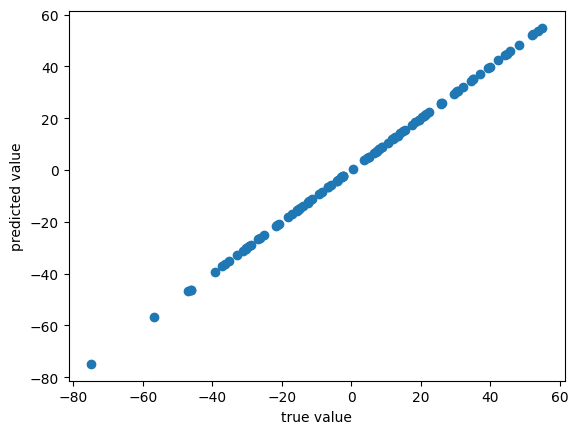

In [12]:
# plot the result
test_labels = test_labels.detach().numpy()
pred = pred.detach().numpy()
plt.scatter(test_labels, pred)
plt.xlabel('true value')
plt.ylabel('predicted value')
plt.show()